In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# print x,y,z of central pixel 

# Read image files
image_dir = "./2018-04-20-10-04-11/kinect/color"
files = os.listdir(image_dir)
image_extensions = ['.png']

for file in files : 
    if os.path.splitext(file)[-1].lower() in image_extensions: # why -1 : the last component of tuple
        image_path = os.path.join(image_dir,file)
        img = cv2.imread(image_path)

        height, width = img.shape[:2] # only height and width

        center_x = width//2
        center_y = width//2

        center_pixel_value = img[center_y, center_x]
        print("center pixel value : ", center_pixel_value)
        # numpy -> np.load : bakcground depth image + standing person -> outline of person
        # array1-array2 ; vectorization = dont need to do whole for loop

center pixel value :  [37 44 43]
center pixel value :  [ 95 108 106]
center pixel value :  [119 129 129]
center pixel value :  [140 148 147]
center pixel value :  [125 135 135]
center pixel value :  [126 133 132]
center pixel value :  [ 82 123 178]
center pixel value :  [118 126 125]
center pixel value :  [114 123 122]
center pixel value :  [132 140 139]
center pixel value :  [121 133 133]
center pixel value :  [134 141 139]
center pixel value :  [ 56  81 118]
center pixel value :  [124 136 134]
center pixel value :  [108 115 114]
center pixel value :  [129 135 134]
center pixel value :  [ 73 110 166]
center pixel value :  [116 126 125]
center pixel value :  [108 145 197]
center pixel value :  [103 143 197]
center pixel value :  [137 143 142]
center pixel value :  [ 66  93 133]
center pixel value :  [110 134 180]
center pixel value :  [131 138 137]
center pixel value :  [139 145 144]
center pixel value :  [124 138 135]
center pixel value :  [ 95 104 103]
center pixel value :  [24 30 29

In [6]:
data = np.load('/Users/sojeonglee/CVL_practice/2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
print(data[:10, :10])  # 처음 10개 행과 열만 출력

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


uint16
0 11192


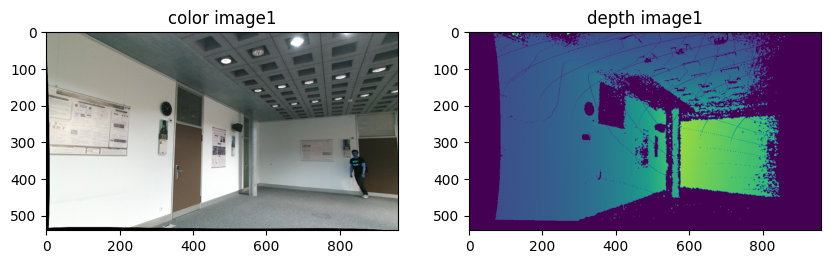

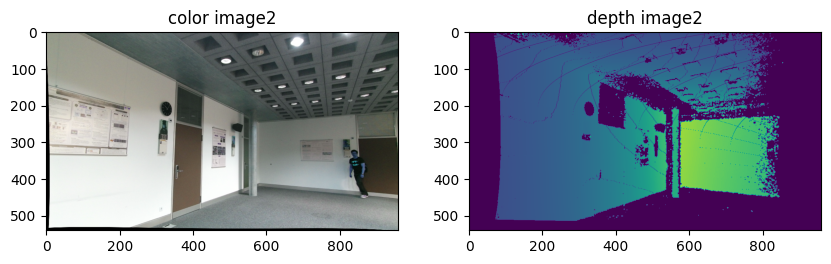

In [7]:
# display images
# color image right next to depth img
# use matplolib subplot    

#load route 
color_image1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
color_image2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452606606063.png')

depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452465143660.npy')

print(depth_image1.dtype)
print(np.amin(depth_image1),np.amax(depth_image2))

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(color_image1)
plt.title('color image1')

plt.subplot(1,2,2)
plt.imshow(depth_image1)
plt.title('depth image1')
plt.show()

plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(color_image2)
plt.title('color image2')

plt.subplot(1,2,2)
plt.imshow(depth_image2)
plt.title('depth image2')
plt.show()



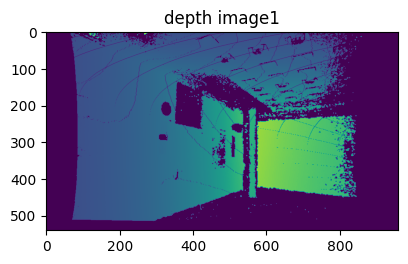

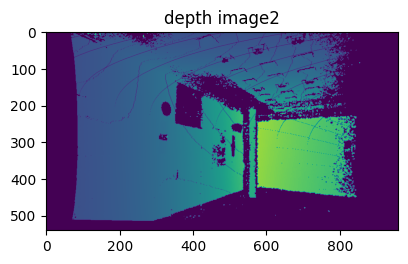

In [8]:
# numpy -> np.load : bakcground depth image + standing person -> outline of person
# array1-array2 ; vectorization = dont need to do whole for loop

# read depth image
depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy')
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452465143660.npy')

plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.imshow(depth_image1)
plt.title('depth image1')
plt.show()

plt.figure(figsize=(10,7))
plt.subplot(1,2,2)
plt.imshow(depth_image2)
plt.title('depth image2')
plt.show()

In [9]:
# In general, figure exists more far than background, so you can choose pixels which has depth value over threshold. 
# cv2.threshold() : you can binarize depth image -> and seperate figure
# cv2.findContours() : you can find outline of figure and extract figure out of the picture.

image = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('.', image)

# binarize
ret, thresh = cv2.threshold(image, 127,255,cv2.THRESH_BINARY)

# contouring
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = cv2.drawContours(image, contours, -1, (0,255,0), 2)

cv2.imshow('image with contours', image_with_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

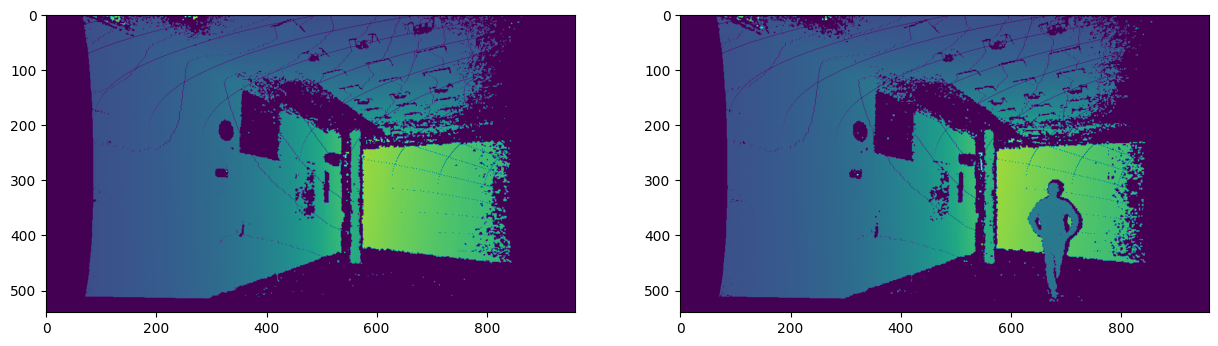

In [6]:
color_image1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
color_image2 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452606606063.png')

depth_image1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211452432110513.npy').astype(np.int64) # background
depth_image2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211484410027189.npy').astype(np.int64)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(depth_image1)

plt.subplot(1,2,2)
plt.imshow(diff)
plt.imshow(depth_image2)

#diff = depth_image2 - depth_image1

#print(np.amax(diff))

#import matplotlib.pyplot as plt
#plt.imshow(diff);plt.show()

11139


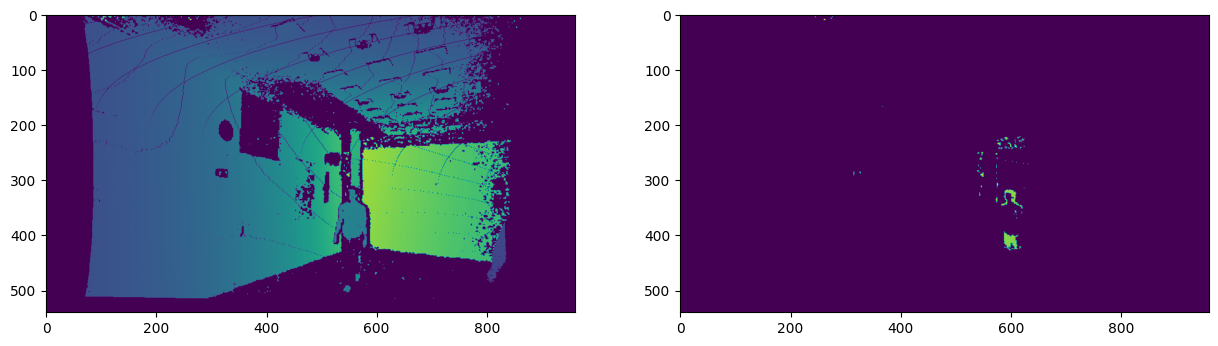

In [3]:
# how to get ouline of person?
# found two photos which have big difference especially the shape of person

# 2018-04-20-10-04-11/kinect/color/1524211455879191910.png -> no person
# 2018-04-20-10-04-11/kinect/color/1524211456141333067.png -> person 

depth1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211455737017041.npy').astype(np.int64)
depth2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211456408511802.npy').astype(np.int64)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(depth2)

diff = depth2 - depth1
# color2[np.where(diff<1000)] *= 0
diff[np.where(diff < 9000)] = 0

print(np.amax(diff))

plt.subplot(1,2,2)
plt.imshow(diff)
plt.show()

#import matplotlib.pyplot as plt
#plt.imshow(diff);plt.show()

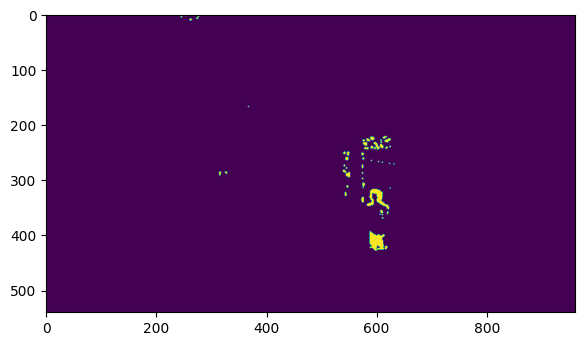

In [20]:
# now it's time to get contour!

# get as image file
cv2.imwrite('diff_image.jpg', diff)

contour_image = cv2.imread('diff_image.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('.', contour_image)

# binarize
ret, thresh = cv2.threshold(contour_image, 127,255,cv2.THRESH_BINARY)

# contouring
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_with_contours = cv2.drawContours(contour_image, contours, -1, (255,0,255), 2)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(image_with_contours)


# cv2.imshow('image with contours', image_with_contours)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

connected components 2


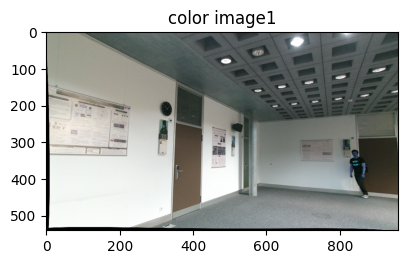

: 

In [12]:
# new hw

# get bounding box
# cv2 algo : connecting components !!!
# group the pixels -> person or noise

# ---------
# 1) get image
color_image1 = cv2.imread('2018-04-20-10-04-11/kinect/color/1524211452545791624.png')
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(color_image1)
plt.title('color image1')

# 2) Connected Component Labeling w/ cv2.connectedComponents()
num_labels, labels = cv2.connectedComponents(gray_image, connectivity=8, ltype=cv2.CV_32S)

if num_labels < 2:
    print("There is no connected components")
else:
    print("connected components", num_labels)

# 3) object classification with characteristic of human
# 4) Drawing Bounding Boxes w/ cv2.rectangle()

min_area = 1000  # 최소 객체 면적
max_area = 10000  # 최대 객체 면적

for label in range(1, num_labels):
    # 각 객체에 대한 마스크 생성
    mask = (labels == label).astype('uint8')

    # 객체의 경계 상자 계산
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(contour)

        # 객체의 높이와 너비 계산
        area = cv2.contourArea(contour)

        # 사람으로 추정되는 객체일 경우 바운딩 박스 그리기
        if min_area < area < max_area and 0.5 < w / h < 2.0:
            gray_image = cv2.rectangle(color_image1, (x, y), (x + w, y + h), (0, 255, 0), 5)

# 결과 출력
plt.imshow(color_image1) #plt.imshow 
plt.show()
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# matplotlib - rgb , opencv bgr
# on color image
# diff - depth image

In [ ]:
# I faced some problem, so got advice from my advisor professor

# Sure, I’d love to answer your question.
# The goal is to use the depth image to process the bounding box, 
# but plot it on the color image. Don’t use the `findContours` code. What we need is the bounding box, which is generated if you use `connectedComponentsWithStats`. One of the things that returns is a bounding box and area.
 
#Here is the flow I would use:
#Take the difference between the background depth image and the current depth image.
#Change that result to be binary, everything that is above a certain threshold is 1, everything else is 0 (use cv.threshold)
#Run that through cv.connectedComponentsWithStats() to get all groups of pixels.
#One of those outputs is called stats, it contains a Nx5 matrix. The 5th column contains the area of each group of pixels. Keep any group is that has an area larger than a certain size (let’s start with 20 pixels)
#For all kept groups, draw the bounding box, which is the stats columns 1-4. Use cv2.rectangle to draw it on the color image.

In [ ]:
# 2018-04-20-10-04-11/kinect/color/1524211455879191910.png -> no person
# 2018-04-20-10-04-11/kinect/color/1524211456141333067.png -> person 

# step 1 : take the diff between depth images
depth1 = np.load('2018-04-20-10-04-11/kinect/depth/1524211455737017041.npy').astype(np.int64)
depth2 = np.load('2018-04-20-10-04-11/kinect/depth/1524211456408511802.npy').astype(np.int64)
difference = depth1 = depth2

# step 2 : binarize
binarized_diff = cv2.imread(difference, cv2.IMREAD_GRAYSCALE)

# step 3 : thresholding 
th, im_th = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY)

# step 4 : get all group of pixels cv.connectedComponentsWithStats()
num_labels, labels = cv2.connectedComponents(img, connectivity=8, ltype=cv2.CV_32S)

# step 5 : 
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binarized_diff)
    
# Iterate through stats to filter out small areas and draw bounding boxes
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    if area > threshold:
        x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        cv2.rectangle(color_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box on color image

